## POD

This notebook demonstrates the functionality of the <code>POD</code> class. As with the <code>AE</code> class, this is a subclass inheriting methods from the parent class.

We will cover POD instantiation, encoding, decoding, and passthrough.

Additionally, we will generate performance data over the whole domain of dimensions. This data is used in the <code>TuningPlotting.ipynb</code> notebook.

Importing the model, loading some data, and normalising it:

In [33]:
from FlowCompression import POD

u_all = POD.preprocess(split=False)  # single array
u_train, u_val, u_test = POD.preprocess()  # split for tuning and evaluation

# POD does not need tuning data
import numpy as np
u_train = np.concatenate((u_train, u_val))

The model is instantiated and fit to the data. The number of modes to consider in reconstruction is variable; it may be specified in the initialiser, but it can also be changed after training.

In [36]:
model = POD(u_train)
model.n = 6

Performing a passthrough and checking performance. <code>model.performance()</code> return a dictionairy of performance metrics. Passthrough encodes then decodes the input, returning the decoded output. The input and output are stored internally and passed to the performance function.

In [37]:
output = model.passthrough(u_test)
print('Arrays matching:', np.all(output == model.output))

print(f'POD performance for {model.n} modes: ')
print(model.performance())

(1152, 1152) (200, 1152) (3800, 24, 24, 2)
Arrays matching: True
POD performance for 6 modes: 
{'mse': 6.121518982233877e-11, 'abs_percentage_median': 94.18092, 'abs_percentage_mean': 91.08337, 'abs_percentage_std': 14.051757, 'div_max': -0.24853802, 'div_min': -0.47044897, 'div_avg': -0.35071006}


(1152, 1152) (200, 1152) (3800, 24, 24, 2)
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
(1152, 1152) (200, 1152) (3800, 24, 24, 2)


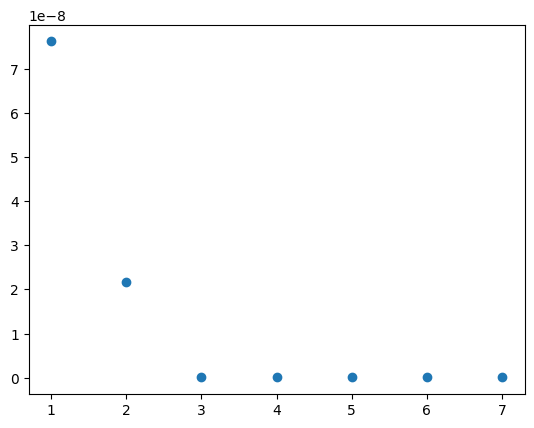

In [38]:
n = []
mse = []
for i in range(1, 8):
    model.n = i
    model.passthrough(u_test)
    n.append(i)
    mse.append(model.performance()['mse'])

import matplotlib.pyplot as plt
plt.scatter(n, mse)

The encoded data is equally accessible.

In [40]:
print(model.encoded[0]) # encoded data for 1 frame

[ 1.7442333e+01  2.0536482e+00 -3.0367539e+00 ...  3.0405819e-05
  1.1384487e-05  1.5094876e-05]


The code below generates and saves the POD performance over the complete domain.

In [43]:
import os
from csv import DictWriter

def gen_val_curve(u_train_, u_test_):
    dim = u_test_.shape
    pod = POD(u_train_)
    y_ = []
    x_ = []

    flag = False
    for n in range(dim[1]*dim[2]):  # max modes n
        pod.n = n+1

        pod.passthrough(u_test_)
        perf = pod.performance()
        write = {**perf}
        write.update({'n': pod.n})

        columns = write.keys()

        rel_strs = ('FlowCompression', 'TuningDivision', f'POD_{train_size}.csv')
        path = os.path.join(os.path.join(os.path.split(__file__)[0], *rel_strs))
        with open(path, 'a', newline='') as f:

            writer = DictWriter(f, columns)

            if not flag:  # write column names, its ugly im sorry
                labels = dict(write)
                for key in labels.keys():
                    labels[key] = key
                writer.writerow(labels)
                flag = True

            writer.writerow(write)  # write results
        # u_test_mse = np.reshape(u_test_, ([dim[0], dim[1]*dim[2]*dim[3]]))
        # output_mse = np.reshape(pod.output, ([dim[0], dim[1]*dim[2]*dim[3]]))
        #
        # y_.append(mean_squared_error(u_test_mse, output_mse))
        # x_.append(n)
    del pod
    return x_, y_

In [44]:
gen_val_curve(u_train, u_test)

(1152, 1152) (200, 1152) (3800, 24, 24, 2)
-0.3451721
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
-0.34712556
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
-0.34952474
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
-0.3495185
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
-0.34947097
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
-0.35071006
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
-0.3509974
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
-0.35096195
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
-0.35060203
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
-0.35274842
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
-0.35275328
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
-0.35302016
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
-0.35412773
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
-0.35424155
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
-0.35632926
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
-0.35762757
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
-0.36063033
(1152, 1152) (200, 1152) (3800, 24, 24, 2)
-0.36161995
(1152, 1152) 

KeyboardInterrupt: 